# 互评作业1: 数据探索性分析与数据预处理
## 1. 问题描述
本次作业中，自行选择2个数据集进行探索性分析与预处理。
## 2.数据集
本次我选择的数据集是
- Alzheimer Disease and Healthy Aging Data in US
- Movies Dataset from Pirated Sites
## 3.数据分析要求
### 3.1 数据摘要和可视化
- 数据摘要
      标称属性，给出每个可能取值的频数
      数值属性，给出5数概括及缺失值的个数
- 数据可视化
      使用直方图、盒图等检查数据分布及离群点
### 3.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

注意：在处理后完成，要对比新旧数据集的差异。
## 代码仓库地址 ：
https://github.com/ZhuoruiLiu12/BIT_DM_homework4.git

# 数据集1：Alzheimer Disease and Healthy Aging Data in US

### 数据摘要和可视化
## 数据摘要：标称属性



In [1]:
import pandas as pd
import os
import numpy as np

In [4]:
file_path = 'datasets/Alzheimer Disease and Healthy Aging Data In US.csv'
res_path = 'result/AlzheimerDataFrequency.csv'

In [10]:
def nominal_attribute_frequency(file_path,res_path):
    # todo: 标称属性，给出每个可能取值的频数
    df = pd.read_csv(file_path,sep=',')
    # * nominal attribute
    # * nominal dict 标称属性字典
    nominal_attribute = df.columns
    nominal_data_frequency = {}
    for column in nominal_attribute:
        df_frequency = df[column].value_counts()
        nominal_data_frequency[column] = df_frequency

    # * dataframe 2 csv
    # PATH = 'result/AlzheimerDataFrequency.csv'
    for key in nominal_data_frequency.keys():
        if os.path.exists(res_path):
            nominal_data_frequency[key].to_csv(res_path,mode='a+',sep=',')
        else:
            nominal_data_frequency[key].to_csv(res_path,sep=',')

    # *修改csv文件内容
    df2 = pd.read_csv(res_path,header=None)
    index = df2[0].isnull()
    for i, v in index.iteritems():
        if v == True:
            temp = df2[1][i]
            df2[0][i] = temp
            df2[1][i] = np.nan
    df2.to_csv(res_path,index=False,header=False)
    print(df2)

In [11]:
nominal_attribute_frequency(file_path,res_path)

E:\Anaconda3\envs\d2l-zh\lib\site-packages\IPython\core\interactiveshell.py:3400: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


              0                   1                   2                  3  \
0     YearStart                 NaN             YearEnd         Data_Value   
1         count            214462.0            214462.0           144629.0   
2          mean  2017.3784773060029  2017.6340004289805  37.34195562439067   
3           std   1.779822047157871  1.7789261240624352  25.18301698523709   
4           min              2015.0              2015.0                0.0   
...         ...                 ...                 ...                ...   
6412        BLK               26968                 NaN                NaN   
6413        NAA               26571                 NaN                NaN   
6414        ASN               26262                 NaN                NaN   
6415     FEMALE               26091                 NaN                NaN   
6416       MALE               25743                 NaN                NaN   

                      4            5                   6  
0   

**由于数据集较大，分析文件篇幅较长，不便放入报告中，可在代码仓库地址中下的result文件夹下查看具体的分析结果文件,下同**

## 数据摘要：数值属性

In [7]:
res_path = 'result/Alzheimer5number.csv'

In [8]:
def numerical_attribute(file_path,res_path):
    # todo:数值属性，给出5数概括及缺失值的个数
    df = pd.read_csv(file_path)
    # 统计数值属性
    df.describe().to_csv(res_path)
    print(df)

In [9]:
numerical_attribute(file_path,res_path)

        YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0            2020     2020           HI       Hawaii      BRFSS   
1            2017     2017           ID        Idaho      BRFSS   
2            2017     2017           ID        Idaho      BRFSS   
3            2018     2018           ID        Idaho      BRFSS   
4            2020     2020           IN      Indiana      BRFSS   
...           ...      ...          ...          ...        ...   
214457       2016     2016           WY      Wyoming      BRFSS   
214458       2015     2015           WY      Wyoming      BRFSS   
214459       2017     2017           WY      Wyoming      BRFSS   
214460       2016     2016           WY      Wyoming      BRFSS   
214461       2018     2018           WY      Wyoming      BRFSS   

                          Class  \
0                Overall Health   
1                 Mental Health   
2                Overall Health   
3                Overall Health   
4                 Me

## 数据可视化

In [12]:
import matplotlib.pyplot as plt

In [13]:
def histogram(file_path, res_path):
    """
    todo: 画直方图
    """
    df = pd.read_csv(file_path)
    df.hist(bins=13, figsize=(10, 10))
    # plt.savefig(res_path)
    # this line will show the figure
    plt.show()

In [14]:
def boxplot(file_path, res_path):
    """
    todo: 画盒图（箱型图）
    :param file_path:
    :param res_path:
    :return:
    """
    df = pd.read_csv(file_path)
    index = df.dtypes
    numerical_attribute = []
    for i, v in index.iteritems():
        if v == 'int64' or v == 'float64':
            numerical_attribute.append(i)
    data = []

    for i in range(len(numerical_attribute)):
        # df.boxplot(column=item)
        data.append(df[numerical_attribute[i]])
        plt.subplot(2, 3, i + 1)
        # plt.title(numerical_attribute[i])
        df[numerical_attribute[i]].to_frame().boxplot()
        # plt.boxplot(df[numerical_attribute[i]])
    plt.tight_layout(pad=1.08)
    # plt.savefig(res_path)
    plt.show()

In [15]:
hist_res_path = 'result/AlzheimerDataHistogram.jpg'
boxp_res_path = 'result/AlzheimerDataBoxplot.jpg'

E:\Anaconda3\envs\d2l-zh\lib\site-packages\IPython\core\interactiveshell.py:3400: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


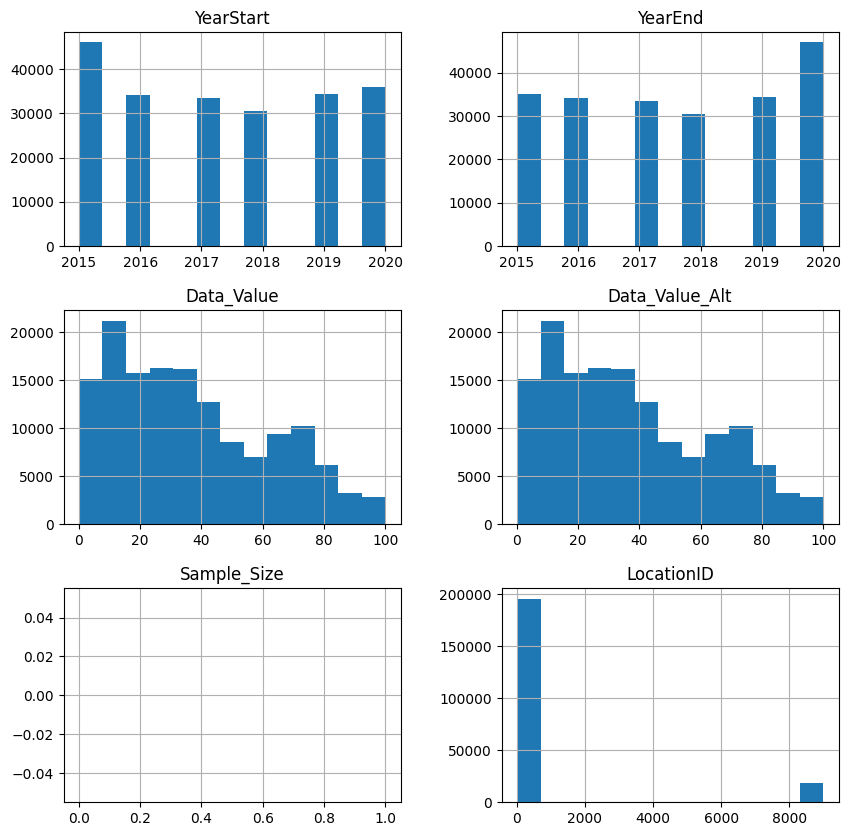

In [16]:
histogram(file_path, hist_res_path)

**说明：Sample_Size属性，数据集中原始数据为全空**

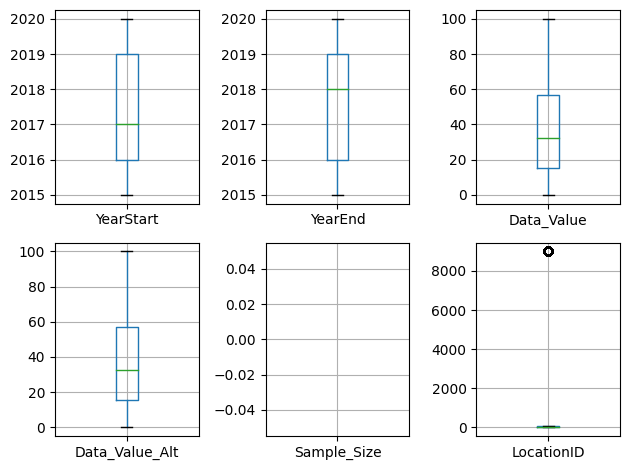

In [17]:
boxplot(file_path, boxp_res_path)

### 数据缺失值处理 并做新旧数据集对比
## 将缺失部分剔除


In [18]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

In [24]:
def numerical_index(df: pd.DataFrame) -> list:
    """
    todo: 求出数据集中的数值属性
    :param df:
    :return:
    """
    numerical_attribute = []
    for i, v in df.dtypes.iteritems():
        if v == 'int64' or v == 'float64':
            numerical_attribute.append(i)
    return numerical_attribute

In [25]:
def miss_index(df: pd.DataFrame) -> list:
    """
    todo: 返回数据集中有缺失的属性 注意属性列全空的情况
    :param df:
    :return:
    """
    res = []
    for i, v in df.isnull().any().iteritems():
        if v:
            res.append(i)
    return res

In [19]:
def data_comparison(origin_data: pd.DataFrame, new_data: pd.DataFrame):
    """
    todo:处理前后数据对比
    :param origin_data:
    :param new_data:
    :return:
    """
    if new_data.empty:
        print("new data is empty!")
        # df_difference = origin_data.compare(new_data)
    else:
        df_difference = origin_data.compare(new_data)
    origin_data.info()
    new_data.info()
    numerical_attribute = numerical_index(origin_data)
    for item in numerical_attribute:
        df_plot = pd.DataFrame({'origin_data': origin_data[item], 'new_data': new_data[item]})
        # plt.hist(origin_data[item].values, alpha=0.5, label="origin data")
        # plt.hist(new_data[item].values, alpha=0.5, label='new data')
        df_plot.hist(bins=12)
        plt.xlabel(item)
        # plt.title(item)
        plt.show()

In [20]:
def delete_missing_data(file_path):
    """
    todo:删除缺失数据
    :param file_path:
    :return:
    """
    df = pd.read_csv(file_path)
    df_new = df.dropna()
    # print(df_new.empty)
    return df, df_new

In [22]:
path = 'datasets/Alzheimer Disease and Healthy Aging Data In US.csv'

E:\Anaconda3\envs\d2l-zh\lib\site-packages\IPython\core\interactiveshell.py:3400: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


new data is empty!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confid

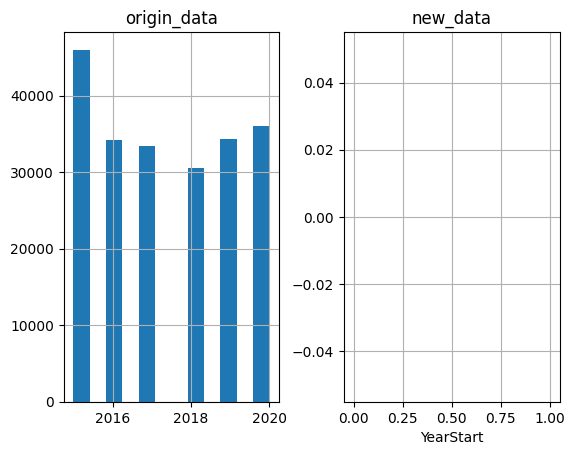

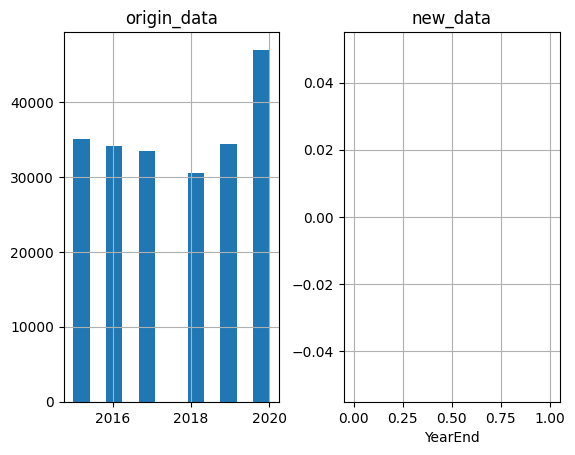

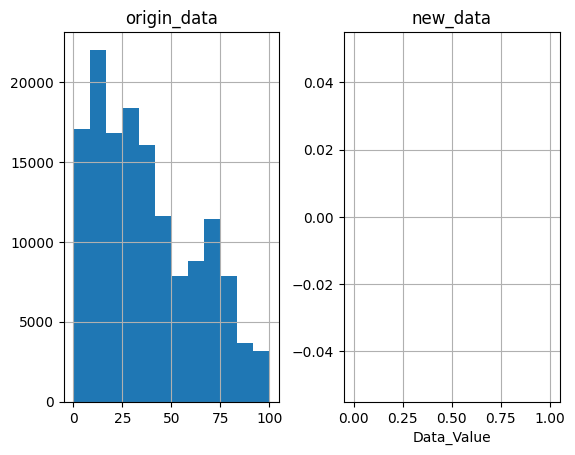

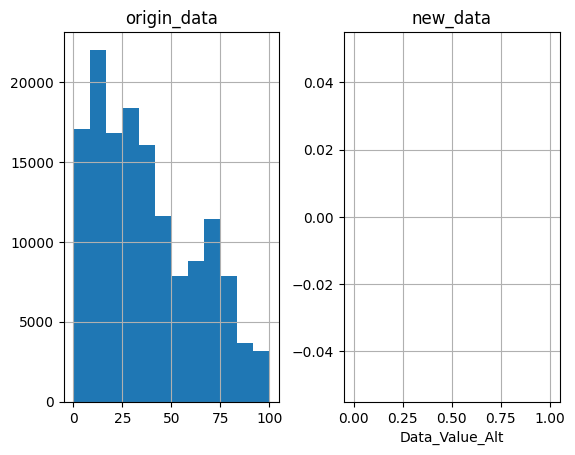

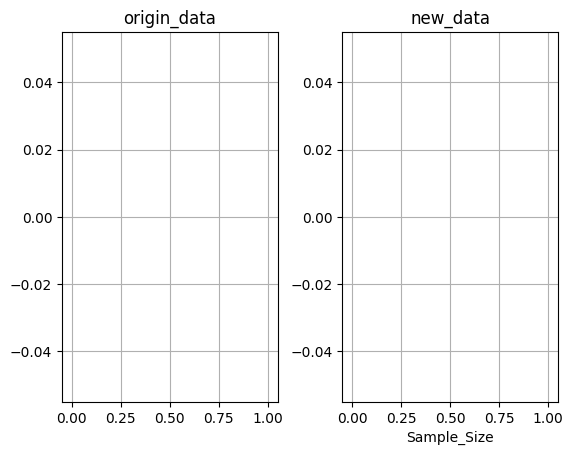

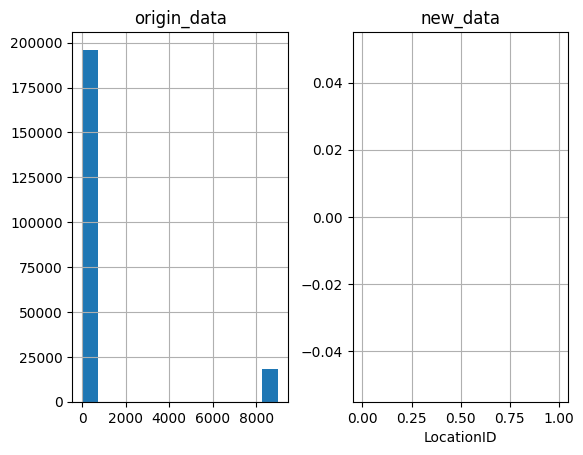

In [26]:
origin_data1, new_data1 = delete_missing_data(path)
data_comparison(origin_data1, new_data1)

**说明：Sample_Size属性，数据集中原始数据为全空，删除操作导致所有数据行都被删除**

## 用最高频率值来填补缺失值

In [27]:
def max_frequency(file_path):
    """
    todo:用最高频率填补缺失值
    :return:
    """
    df = pd.read_csv(file_path)
    # columns = df.columns.values.tolist()
    for i, v in df.isnull().any().iteritems():
        if v and (not df[i].value_counts().empty):
            max_value = df[i].value_counts().idxmax()
            df[i].fillna(max_value, inplace=True)
    df_old = pd.read_csv(file_path)
    return df_old, df

In [28]:
origin_data2, new_data2 = max_frequency(path)

E:\Anaconda3\envs\d2l-zh\lib\site-packages\IPython\core\interactiveshell.py:3400: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

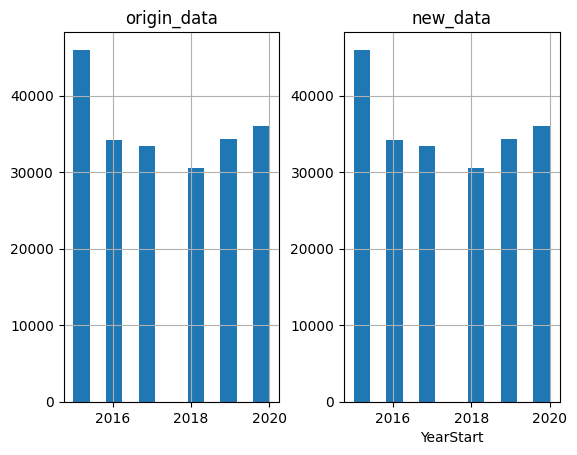

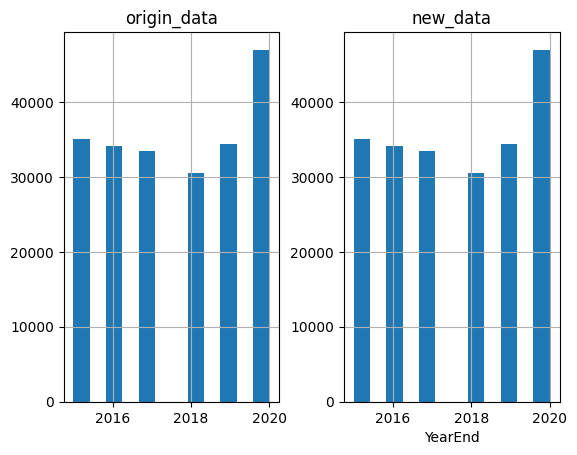

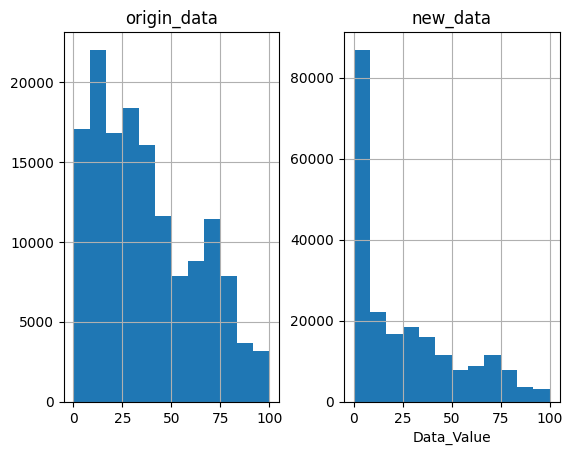

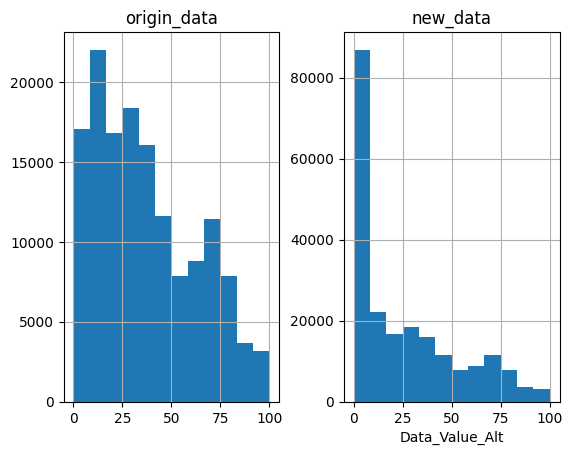

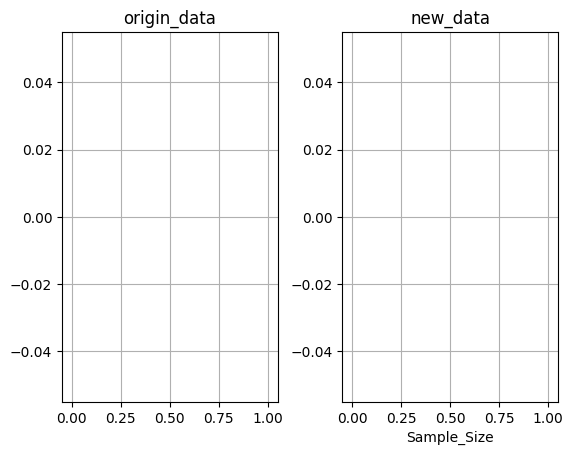

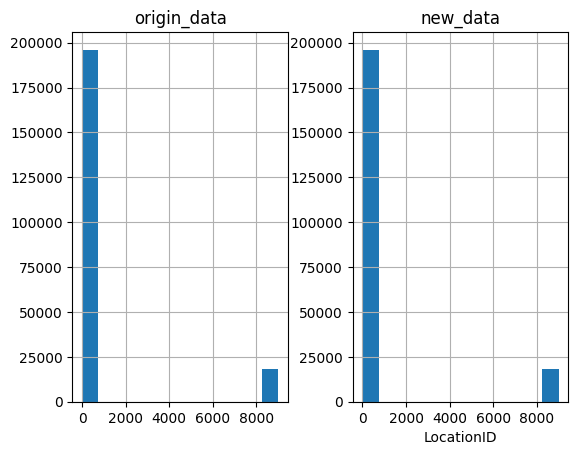

In [29]:
data_comparison(origin_data2, new_data2)

## 通过属性的相关关系来填补缺失值

In [30]:
def attr_corr_fill(file_path):
    df = pd.read_csv(file_path)
    miss_attr = miss_index(df)
    attr = df.columns.tolist()
    comp_attr = []
    for item in attr:
        if item not in miss_attr:
            comp_attr.append(item)

    def set_miss_value(df: pd.DataFrame, comp_attr: list):
        """
        todo:使用RF算法 根据属性相关性补全缺失值
        :param df:
        :param comp_attr:
        :return:
        """
        enc_label = OrdinalEncoder()
        # enc_label = LabelEncoder()
        enc_fea = OrdinalEncoder()
        missing_index = comp_attr[0]

        train_df = df[comp_attr]
        known_values = np.array(train_df[train_df[missing_index].notnull()])
        unknown_values = np.array(train_df[train_df[missing_index].isnull()])

        y = known_values[:, 0].reshape(-1, 1).astype(str)
        # print(y.dtype)
        # str_list = ['Low_Confidence_Limit', 'High_Confidence_Limit']
        # if missing_index in str_list:
        #     y.astype(str)
        enc_label.fit(y)
        # enc_label.fit_transform(y)
        y = enc_label.transform(y)

        x = known_values[:, 1:].astype(str)
        x_test = unknown_values[:, 1:].astype(str)
        x_all = np.row_stack((x, x_test))
        enc_fea.fit(x_all)
        x = enc_fea.transform(x)

        # fit
        rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
        rfr.fit(x, y.ravel())
        # predict
        predict_value = rfr.predict(enc_fea.transform(unknown_values[:, 1:].astype(str)))
        predict_value = enc_label.inverse_transform(predict_value.reshape(-1, 1))

        df.loc[(df[missing_index].isnull()), missing_index] = predict_value
        return df

    df_cp = df.copy(deep=True)
    for i in range(0, len(miss_attr)):
        if not df[miss_attr[i]].isnull().all():
            comp_attr.insert(0, miss_attr[i])
            df_cp = set_miss_value(df_cp, comp_attr)
    # if not df[miss_attr[4]].isnull().all():
    #     pass,ml,
    #     print(0)
    # comp_attr.insert(0, miss_attr[0])
    # df_cp = set_miss_value(df_cp, comp_attr)
    return df, df_cp

E:\Anaconda3\envs\d2l-zh\lib\site-packages\IPython\core\interactiveshell.py:3400: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

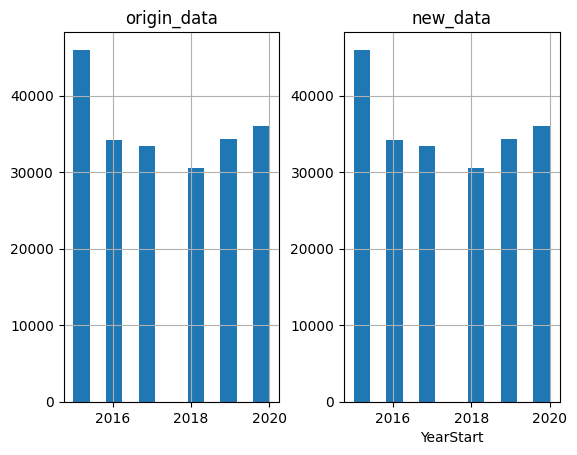

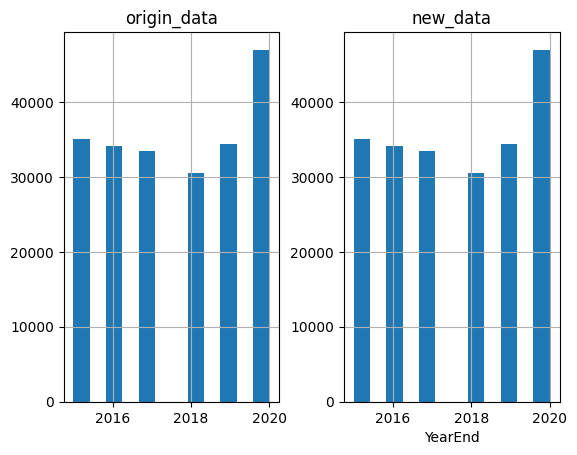

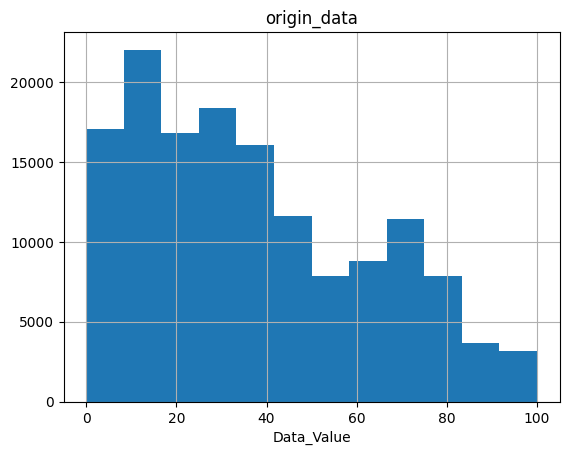

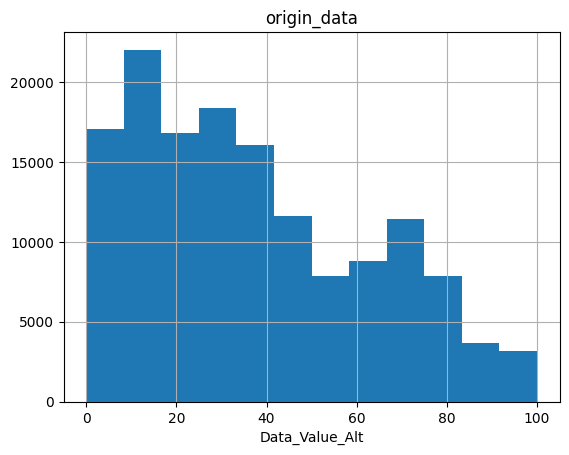

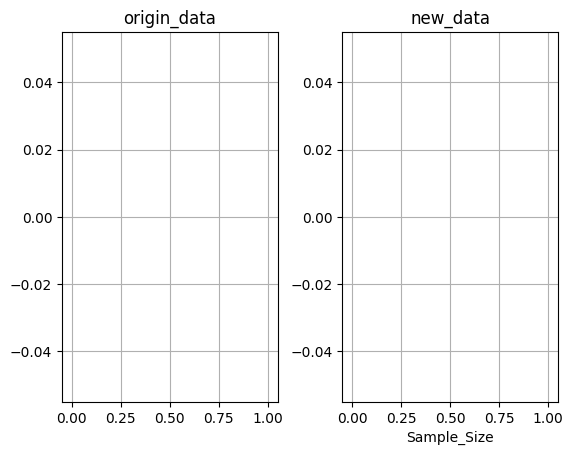

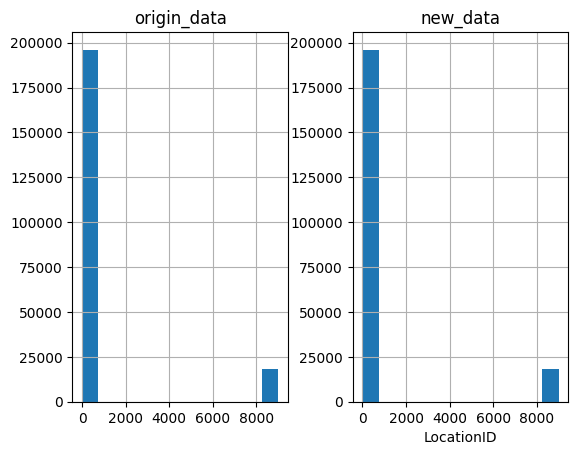

In [31]:
origin_data3, new_data3 = attr_corr_fill(path)
data_comparison(origin_data3, new_data3)

### **数据转换回浮点型再作图**

In [34]:
new_data3[['Data_Value', 'Data_Value_Alt']] = new_data3[['Data_Value', 'Data_Value_Alt']].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

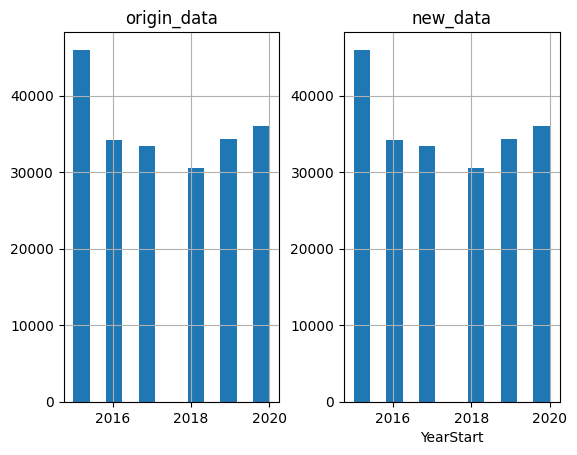

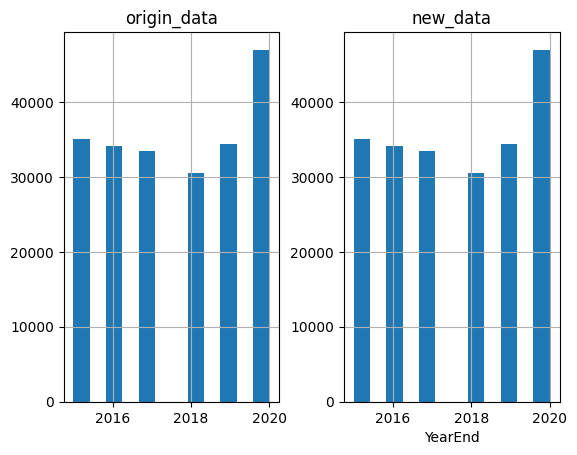

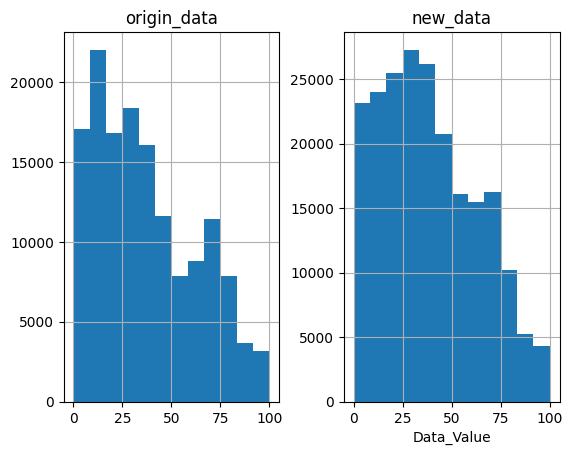

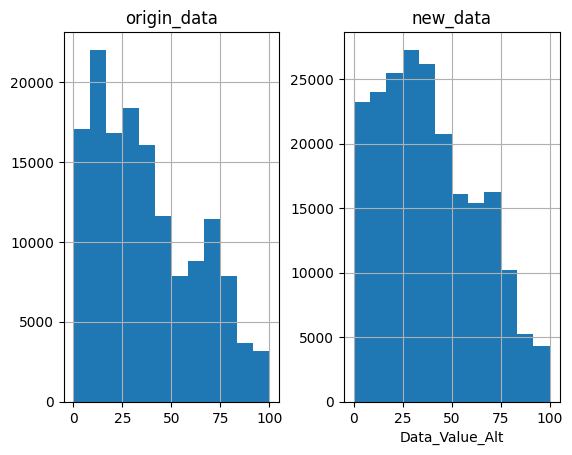

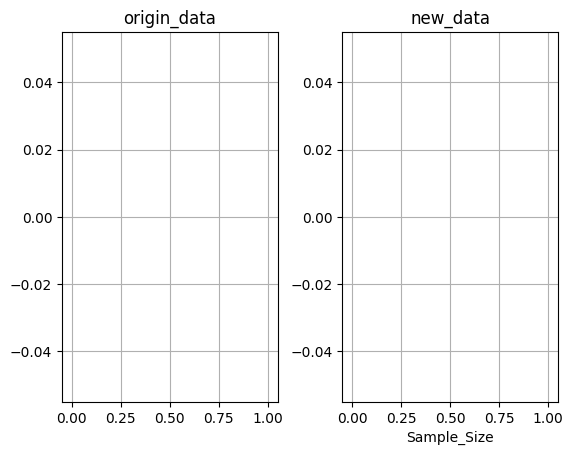

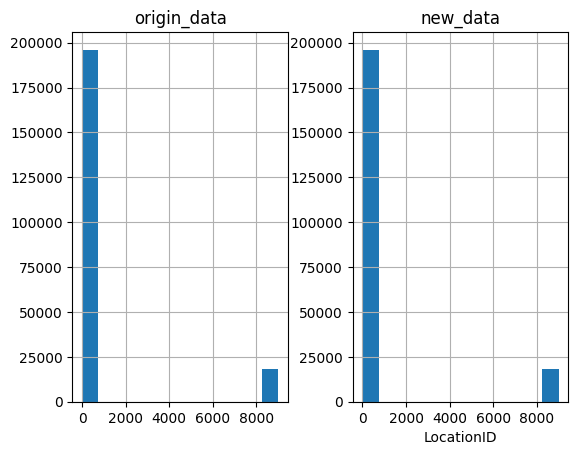

In [35]:
data_comparison(origin_data3, new_data3)

## 通过数据对象之间的相似性来填补缺失值

In [36]:
def simi_fill(file_path, k=30):
    """
    todo:通过数据对象之间的相似性来填补缺失值 使用knn聚类求相似对象
    :param file_path:
    :return:
    """
    # KNN
    df = pd.read_csv(file_path)
    df_cp = df.copy(deep=True)
    numerical_attr = numerical_index(df)
    # df_cp[numerical_attr].values
    # imputed_training = fast_knn(df_cp[numerical_attr].values, k=k)
    # imputed_training = pd.DataFrame(data=imputed_training, columns=numerical_attr)
    # df_cp[numerical_attr] = imputed_training[numerical_attr]
    # knn = KNeighborsClassifier(n_neighbors=k)
    for i in numerical_attr:
        if df[i].isnull().all():
            numerical_attr.remove(i)
    imputer = KNNImputer(n_neighbors=k)
    df_filled = imputer.fit_transform(df[numerical_attr])
    df_filled = pd.DataFrame(df_filled, columns=numerical_attr)
    df_cp[numerical_attr] = df_filled[numerical_attr]
    return df, df_cp

In [37]:
origin_data4, new_data4 = simi_fill(path)

E:\Anaconda3\envs\d2l-zh\lib\site-packages\IPython\core\interactiveshell.py:3400: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

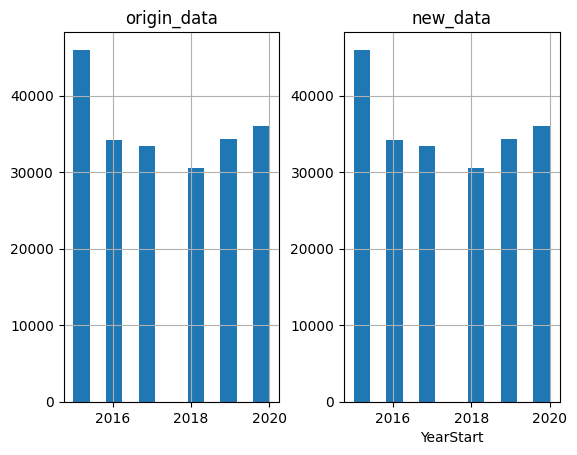

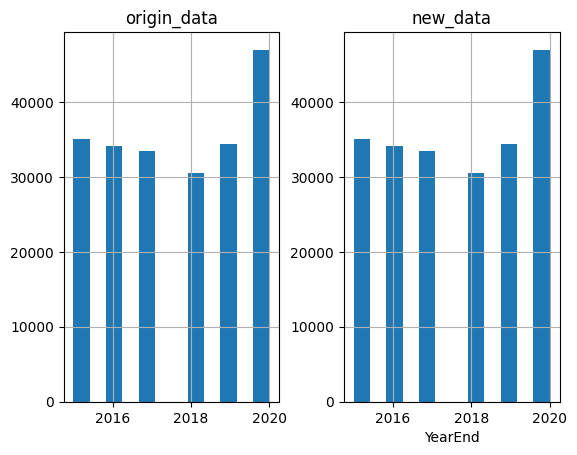

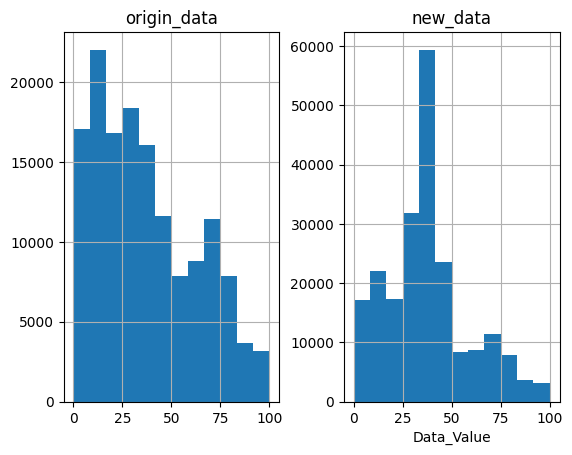

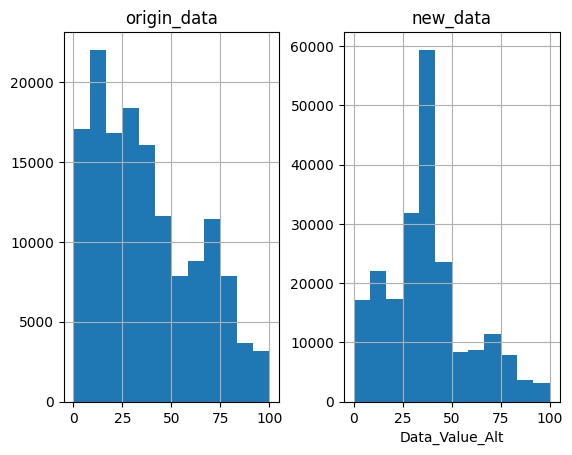

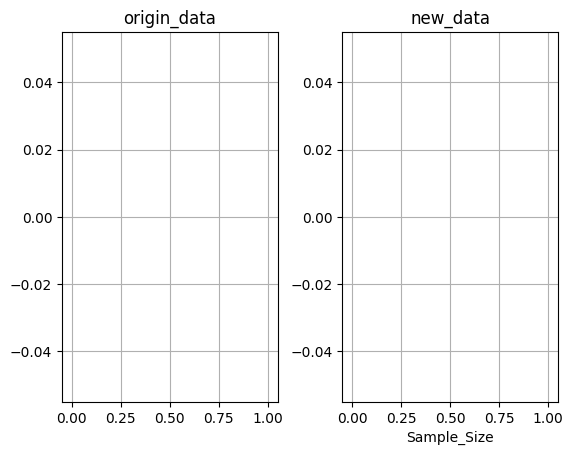

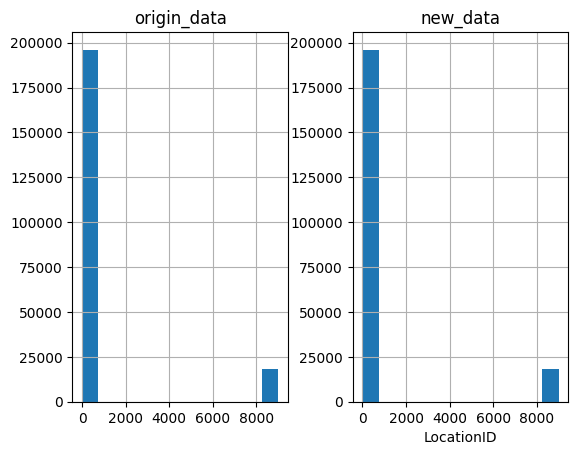

In [38]:
data_comparison(origin_data4, new_data4)

# 数据集2：movies_dataset

### 数据摘要和可视化
## 数据摘要：标称属性


In [39]:
file_path = "datasets/movies_dataset.csv"
res_path = 'result/moviesDataFrequency.csv'

In [40]:
nominal_attribute_frequency(file_path,res_path)

E:\Anaconda3\envs\d2l-zh\lib\site-packages\IPython\core\interactiveshell.py:3400: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


                                                     0      1
0                                          IMDb-rating    NaN
1                                                  6.6  829.0
2                                                  5.0  774.0
3                                                  5.7  747.0
4                                                  6.1  724.0
...                                                ...    ...
443391                                  Freddie Machin      1
443392                Hicham Hajji, Jonathan McConnell      1
443393  Radhika Apte, Dibakar Banerjee, Anurag Kashyap      1
443394                                 Tommy Lee Jones      1
443395                      Kenneth Lemm, Kenneth Lemm      1

[443396 rows x 2 columns]


## 数据摘要：数值属性

In [41]:
res_path = 'result/movies5number.csv'

In [42]:
numerical_attribute(file_path,res_path)

       IMDb-rating appropriate_for      director downloads      id  \
0              4.8               R     John Swab       304  372092   
1              6.4           TV-PG   Paul Ziller        73  372091   
2              5.2               R  Ben Wheatley     1,427  343381   
3              8.1             NaN  Venky Atluri     1,549  372090   
4              4.6             NaN  Shaji Kailas       657  372089   
...            ...             ...           ...       ...     ...   
20543          NaN             NaN           NaN     1,998   28957   
20544          7.7             NaN     Bimal Roy     6,080   28958   
20545          8.0             NaN           NaN     3,276   30459   
20546          NaN             NaN           NaN       309  371669   
20547          NaN             NaN           NaN     2,613  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
1      Hollywoo

## 数据可视化

In [43]:
hist_res_path = 'result/moviesDataHistogram.jpg'
boxp_res_path = 'result/moviesDataBoxplot.jpg'

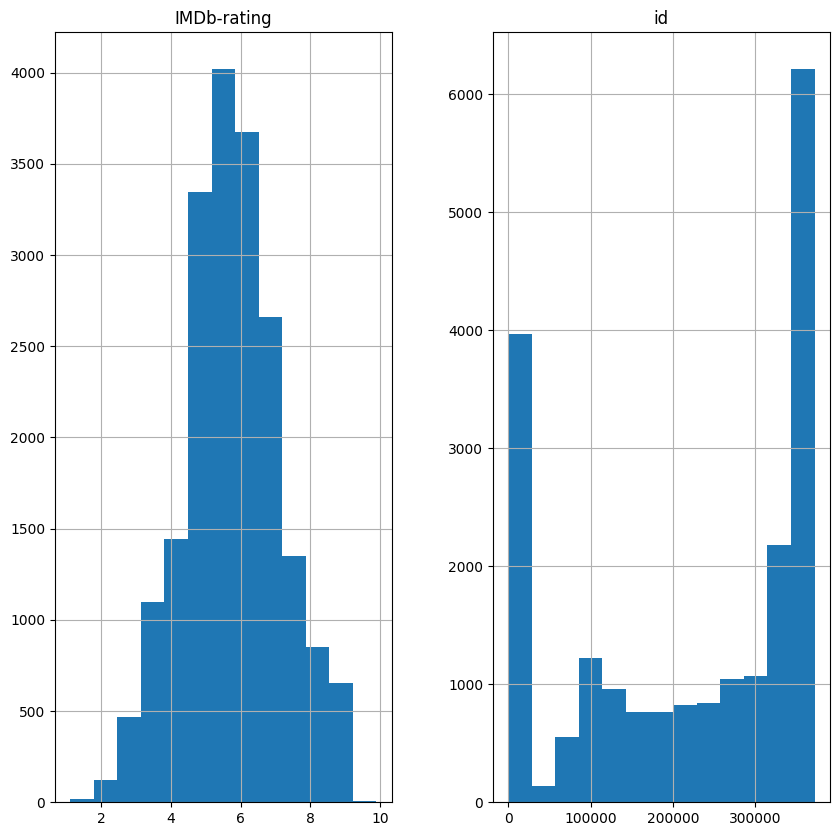

In [44]:
histogram(file_path, hist_res_path)

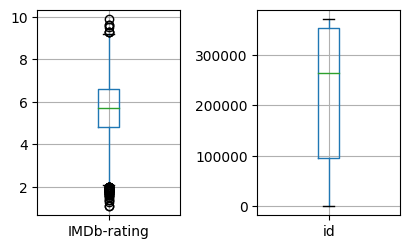

In [45]:
boxplot(file_path, boxp_res_path)

### 数据缺失值处理 并做新旧数据集对比
## 将缺失部分剔除


In [46]:
path = 'datasets/movies_dataset.csv'

In [47]:
origin_data1, new_data1 = delete_missing_data(path)

In [51]:
def data_comparison(origin_data: pd.DataFrame, new_data: pd.DataFrame):
    """
    todo:处理前后数据对比
    :param origin_data:
    :param new_data:
    :return:
    """
#     if new_data.empty:
#         print("new data is empty!")
#         # df_difference = origin_data.compare(new_data)
#     else:
#         df_difference = origin_data.compare(new_data)
    origin_data.info()
    new_data.info()
    numerical_attribute = numerical_index(origin_data)
    for item in numerical_attribute:
        df_plot = pd.DataFrame({'origin_data': origin_data[item], 'new_data': new_data[item]})
        # plt.hist(origin_data[item].values, alpha=0.5, label="origin data")
        # plt.hist(new_data[item].values, alpha=0.5, label='new data')
        df_plot.hist(bins=12)
        plt.xlabel(item)
        # plt.title(item)
        plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  object 
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  object 
 13  writer           18356 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9902 entries, 0 to 20540
Data columns (tot

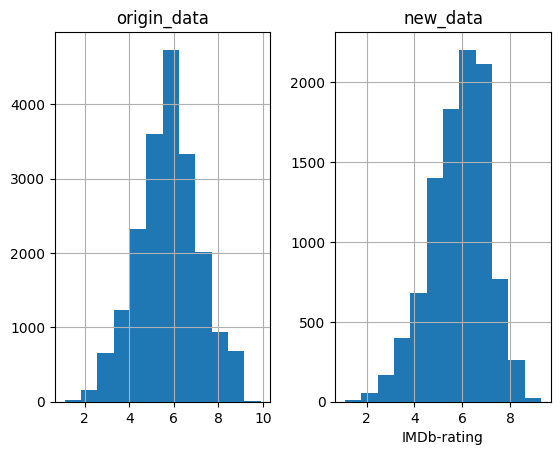

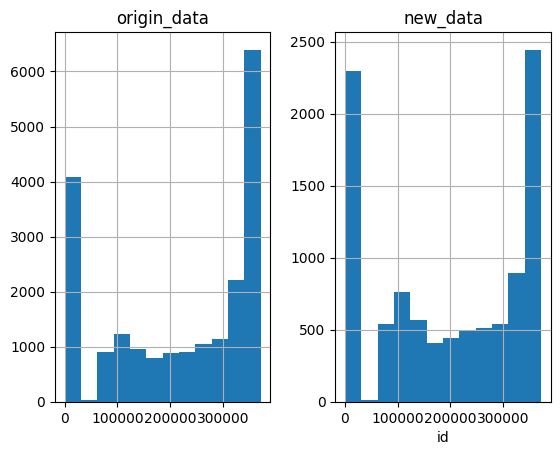

In [52]:
data_comparison(origin_data1, new_data1)

## 用最高频率值来填补缺失值

In [53]:
origin_data2, new_data2 = max_frequency(path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  object 
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  object 
 13  writer           18356 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (to

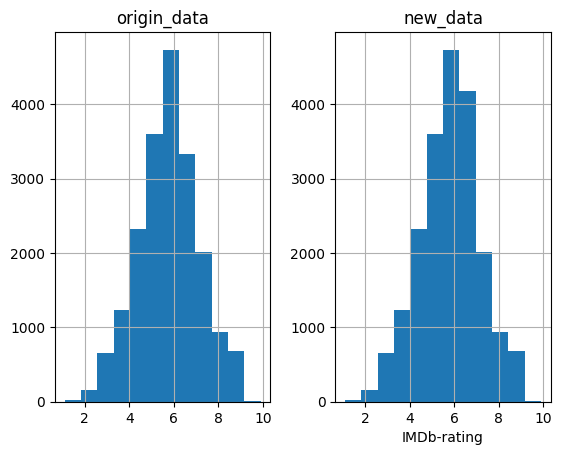

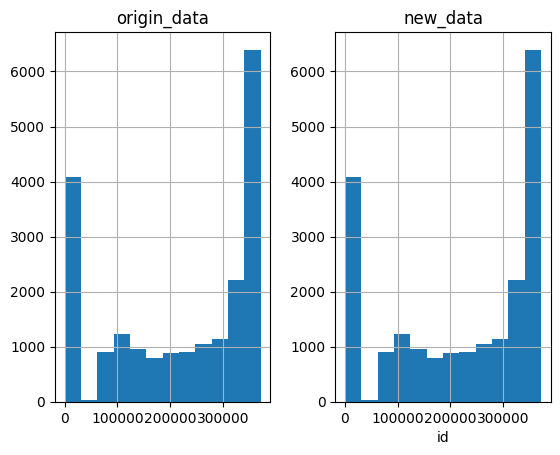

In [54]:
data_comparison(origin_data2, new_data2)

## 通过属性的相关关系来填补缺失值

In [55]:
origin_data3, new_data3 = attr_corr_fill(path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  object 
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  object 
 13  writer           18356 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (to

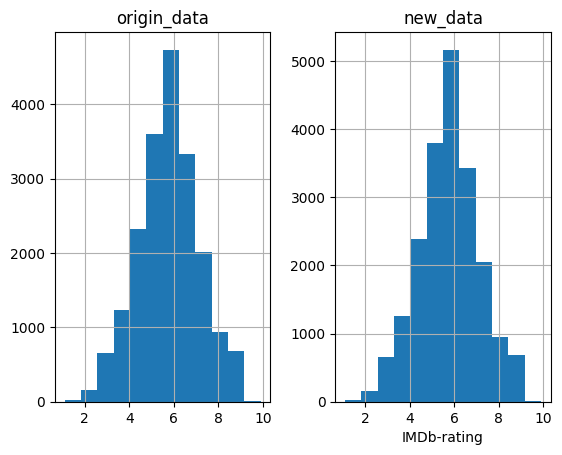

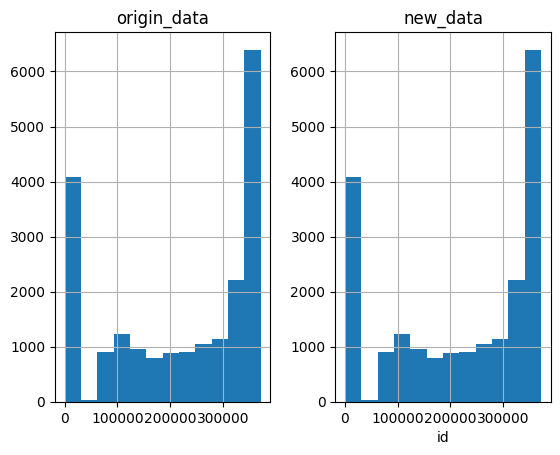

In [57]:
new_data3[['IMDb-rating']] = new_data3[['IMDb-rating']].astype(float)
data_comparison(origin_data3, new_data3)

## 通过数据对象之间的相似性来填补缺失值

In [58]:
origin_data4, new_data4 = simi_fill(path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  object 
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  object 
 13  writer           18356 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (to

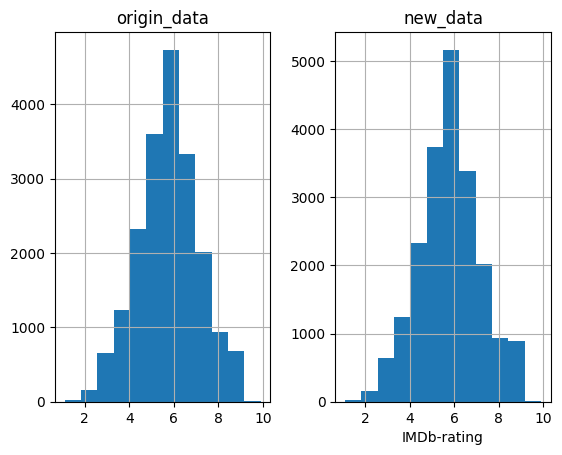

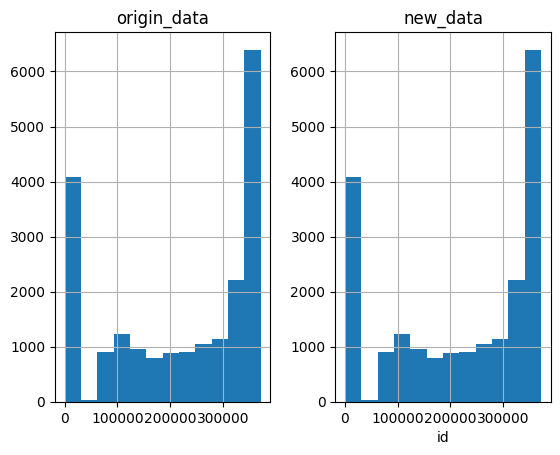

In [59]:
data_comparison(origin_data4, new_data4)

## 结果分析
### 数据集1：Alzheimer Disease and Healthy Aging Data in US
-----
1. 标称属性频率具体的结果文件在github代码仓库地址的result文件夹下可以找到，由于篇幅较长，在此处不便于展示，只展示简要信息
2. 由于数据集中Sample_Size属性列为空（原始数据集即为空），导致删除空值属性时，会将所有数据行删除
3. 作图时只对int和float类型的数据作图，Alzheimer Disease and Healthy Aging Data in US数据集只有6个数值属性，故只有6张图
4. 属性补全时，根据最大频率补全和属性相关关系补全可以补全所有类型的缺失值（包括str、int、float），而根据数据对象之间相似性填补缺失值，由于要计算数据对象之间的相似度，故只对数值属性（float、int）进行补全
-----
### 数据集2：movies_dataset
-----
1. 由于原始数据集第一列属性为index，即所有数据行的索引，而在处理过程中pandas包有相应的方法能替代index属性的作用，所以我将这列属性删除，减少处理阻碍
2. 标称属性频率具体的结果文件在github代码仓库地址的result文件夹下可以找到，由于篇幅较长，在此处不便于展示，只展示简要信息
3. 作图时只对int和float类型的数据作图，movies_dataset数据集经过处理之后只有2个数值属性，故只有2张图
4. 属性补全时，根据最大频率补全和属性相关关系补全可以补全所有类型的缺失值（包括str、int、float），而根据数据对象之间相似性填补缺失值，由于要计算数据对象之间的相似度，故只对数值属性（float、int）进行补全
